In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#text cleaning libraries
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


import scipy

import tensorflow as t
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

#importing libraries to handle warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sunil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_excel('Tweets.xlsx')

In [3]:
df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306000000000000,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/2015 11:35,NaN,Eastern Time (US & Canada)
1,570301000000000000,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
2,570301000000000000,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/2015 11:15,Lets Play,Central Time (US & Canada)
3,570301000000000000,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
4,570301000000000000,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/2015 11:14,NaN,Pacific Time (US & Canada)
5,570301000000000000,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,24/02/2015 11:14,NaN,Pacific Time (US & Canada)
6,570301000000000000,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,24/02/2015 11:13,San Francisco CA,Pacific Time (US & Canada)
7,570300000000000000,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,24/02/2015 11:12,Los Angeles,Pacific Time (US & Canada)
8,570300000000000000,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,24/02/2015 11:11,San Diego,Pacific Time (US & Canada)
9,570295000000000000,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,24/02/2015 10:53,Los Angeles,Eastern Time (US & Canada)


In [4]:
pd.to_datetime(df['tweet_created'])

0       2015-02-24 11:35:00
1       2015-02-24 11:15:00
2       2015-02-24 11:15:00
3       2015-02-24 11:15:00
4       2015-02-24 11:14:00
                ...        
14635   2015-02-22 12:01:00
14636   2015-02-22 11:59:00
14637   2015-02-22 11:59:00
14638   2015-02-22 11:59:00
14639   2015-02-22 11:58:00
Name: tweet_created, Length: 14640, dtype: datetime64[ns]

In [5]:
df['tweet_created'].groupby(df['airline_sentiment'])

In [6]:
round(df['airline_sentiment'].groupby(df['airline']).value_counts(normalize=True)*100,1)

airline         airline_sentiment
American        negative             71.0
                neutral              16.8
                positive             12.2
Delta           negative             43.0
                neutral              32.5
                positive             24.5
Southwest       negative             49.0
                neutral              27.4
                positive             23.6
US Airways      negative             77.7
                neutral              13.1
                positive              9.2
United          negative             68.9
                neutral              18.2
                positive             12.9
Virgin America  negative             35.9
                neutral              33.9
                positive             30.2
Name: airline_sentiment, dtype: float64

# Sentiment Analysis

In [7]:
df = df[['airline_sentiment', 'text']]

In [8]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [9]:
stops = stopwords.words('english')

In [10]:
def text_cleaner(text):
    text = text.lower()
    text = re.sub('[^a-z]', ' ', text)
    words = text.split()
    meaningful_words = [w for w in words if w not in stops]
    
    return (' '.join(meaningful_words))

In [11]:
demo = 'The sun is the reddish object I see in the sky and it is the brightest star'


In [12]:
text_cleaner(demo)

'sun reddish object see sky brightest star'

In [13]:
df['cleaned_text'] = df['text'].apply(lambda x : text_cleaner(x))   #lamdba is a temporary storage place where each row is stored for particular operation

In [14]:
df.head()

,airline_sentiment,text,cleaned_text
0,neutral,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said
1,positive,@VirginAmerica plus you've added commercials t...,virginamerica plus added commercials experienc...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anothe...
3,negative,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...
4,negative,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing


In [15]:
df = df[['cleaned_text', 'airline_sentiment']]

In [16]:
df.head()

,cleaned_text,airline_sentiment
0,virginamerica dhepburn said,neutral
1,virginamerica plus added commercials experienc...,positive
2,virginamerica today must mean need take anothe...,neutral
3,virginamerica really aggressive blast obnoxiou...,negative
4,virginamerica really big bad thing,negative


In [17]:
le = LabelEncoder()

In [18]:
df['airline_sentiment'] = le.fit_transform(df['airline_sentiment'])

In [19]:
df.head()

,cleaned_text,airline_sentiment
0,virginamerica dhepburn said,1
1,virginamerica plus added commercials experienc...,2
2,virginamerica today must mean need take anothe...,1
3,virginamerica really aggressive blast obnoxiou...,0
4,virginamerica really big bad thing,0


In [20]:
x_train, x_test, y_train, y_test = train_test_split(df['cleaned_text'], df['airline_sentiment'], test_size= 0.2, random_state=50)

In [21]:
tf = TfidfVectorizer()   

In [22]:
# Whenever we use tfidf vectorizer always fit_transform the train data (x_train) and just transform the test data (x_test)

In [23]:
x_train = tf.fit_transform(x_train)
x_test = tf.transform(x_test)

In [24]:
x_train

<11712x11926 sparse matrix of type '<class 'numpy.float64'>'
	with 114421 stored elements in Compressed Sparse Row format>

In [25]:
x_test

<2928x11926 sparse matrix of type '<class 'numpy.float64'>'
	with 26642 stored elements in Compressed Sparse Row format>

In [26]:
x_train = scipy.sparse.csr_matrix.todense(x_train)
x_test = scipy.sparse.csr_matrix.todense(x_test)

In [27]:
x_train.shape

(11712, 11926)

In [28]:
x_test.shape

(2928, 11926)

# Model building

In [29]:
model = Sequential([Dense(11712,activation='relu', input_shape = (11926,)),
                    Dense(128, activation = 'relu'),
                    Dense(64, activation = 'tanh'),
                    Dense(3, activation = 'softmax')])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11712)             139689024 
                                                                 
 dense_1 (Dense)             (None, 128)               1499264   
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 141,196,739
Trainable params: 141,196,739
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='Adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
118/118 [==============================] - 75s 630ms/step - loss: 0.6196 - accuracy: 0.7455 - val_loss: 0.5338 - val_accuracy: 0.7801
Epoch 2/10
118/118 [==============================] - 74s 626ms/step - loss: 0.2277 - accuracy: 0.9191 - val_loss: 0.6912 - val_accuracy: 0.7715
Epoch 3/10
118/118 [==============================] - 72s 607ms/step - loss: 0.0689 - accuracy: 0.9783 - val_loss: 0.8454 - val_accuracy: 0.7592
Epoch 4/10
118/118 [==============================] - 73s 616ms/step - loss: 0.0302 - accuracy: 0.9907 - val_loss: 0.9559 - val_accuracy: 0.7647
Epoch 5/10
118/118 [==============================] - 71s 599ms/step - loss: 0.0204 - accuracy: 0.9935 - val_loss: 0.9967 - val_accuracy: 0.7766
Epoch 6/10
118/118 [==============================] - 69s 587ms/step - loss: 0.0157 - accuracy: 0.9946 - val_loss: 1.0310 - val_accuracy: 0.7684
Epoch 7/10
118/118 [==============================] - 69s 585ms/step - loss: 0.0139 - accuracy: 0.9947 - val_loss: 1.0778 - val_ac

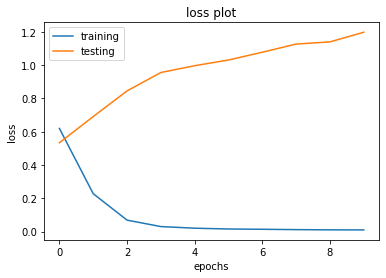

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss plot')
plt.legend(['training', 'testing'])

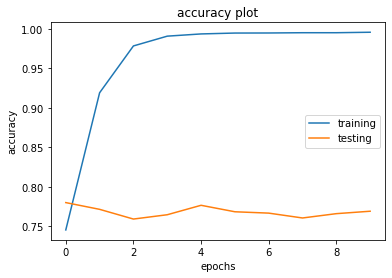

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy plot')
plt.legend(['training', 'testing'])